# ※ 필요한 패키지 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import platform
# 8,9번 EDA에 사용
import matplotlib.ticker as ticker
from scipy.interpolate import interp1d

In [2]:
# 마이너스 부호 출력 오류
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 출력 오류
system_name = platform.system()
if system_name == 'Windows':
    # Windows 운영체제
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    # Mac OS
    plt.rc('font', family='AppleGothic')
elif system_name == 'Linux':
    # Linux
    path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
    font_name = fm.FontProperties(fname=path, size=12)
    plt.rc('font', family=font_name)
else:
    print("Not support")

In [3]:
# 아래의 전처리부분을 전부 실행하면 daegu.csv 파일이 생성됨
# 파일이 있으면 여기를 실행해서 아래의 EDA를 할 것
df_pre = pd.read_csv('output/daegu_final.csv')

<hr>

# EDA

#### Period
- 2022-05-06 ~ ???

#### Index
0. 기본적인 데이터 탐색

1. 겨울에 따뜻하면 여름에 폭염이 나타난다.
2. 인구밀도가 높은 지역은 상대적으로 열지수가 높다.
3. 지역용도에 따라 열지수의 차이가 나타난다.( 공단,상업,주거,산지,빌딩숲 등)
4. 기저질환 환자가 온열질환 취약계층이다.
5. 대구의 지형 특징상(분지) 열섬현상이 자주 발생한다.
6. 겨울에 추우면 전력 소비량과 온실 가스 배출량이 늘어 여름에 덥다.
7. 교통량이 많으면 엔진의 열배출이 기온에 영향을 미친다. 
8. 비가 온 날이 많으면 폭염기간에 열지수가 높다. (폭염과 습도의 관계)
9. 대기중의 미세먼지 농도가 높으면 온도가 높다.(‘미세먼지가 많으면 통풍이 잘 안된다’ 속설 검증)
10. 나무를 많이 심으면 온도가 떨어진다. (대구 녹지사업 참고)

-----

# 8. 비가 온 날이 많으면 폭염기간에 열지수가 높다. (폭염과 습도의 관계)
- made by MJ

In [4]:
# 복사본으로 작업
EDAset = df_pre.copy()

In [5]:
# 날짜 컬럼 생성
EDAset['date'] = pd.to_datetime(EDAset[['year', 'month', 'day','hour']])

<세부분석>
1. 우천일과 열지수의 관계
    + 연도별 전체 우천일의 수와 최고 열지수
2. 강수량과 열지수의 관계
3. 습도와 기온의 관계
    + 매년 월별 평균 습도와 평균 기온
5. 강수량과 기온의 관계

##### 1. 각 해, 달마다 비가 온 날의 수와 최고 열지수

In [6]:
# 2018년, 효목1동 기준 (대구지방기상청 소재지)
condyear = EDAset['year'] == 2018
condregion = EDAset['region'] == '효목1동'
df2011_HM = EDAset[condyear & condregion]
rainfall = df2011_HM.copy()

In [7]:
# 비 온 날 카운트
count_rain = []
max_HI = []
max_hum = []
month = []


for i in range(1,13) :
    rain_temp = rainfall[rainfall['month'] == i]
    # 비 온 날 카운트 리스트
    cond = rain_temp[rain_temp['rainfall'] > 0.0]
    count_rain.append(cond.count())
    # 최고기온 리스트
    max_HI.append(round(rain_temp['HI'].max(),2))
    # 최고습도 리스트
    max_hum.append(rain_temp['humidity'].mean())
    # 데이터 있는 달 리스트
    month.append(i)

# 출력
counts_rain = [i[0] for i in count_rain]

print("측정달", month)
print("우천 발생수 (시간당)", counts_rain)
print("최고 열지수", max_HI)
print("최고 습도", max_hum)

측정달 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
우천 발생수 (시간당) [48, 23, 102, 80, 93, 84, 61, 66, 57, 40, 16, 23]
최고 열지수 [11.34, 12.83, 24.69, 29.01, 33.04, 34.63, 41.33, 40.7, 29.67, 24.82, 19.27, 15.14]
최고 습도 [51.51075268817204, 43.017857142857146, 62.89650537634409, 57.10138888888889, 66.18279569892474, 64.0513888888889, 66.24193548387096, 67.71370967741936, 70.33888888888889, 63.211021505376344, 62.458333333333336, 50.211021505376344]


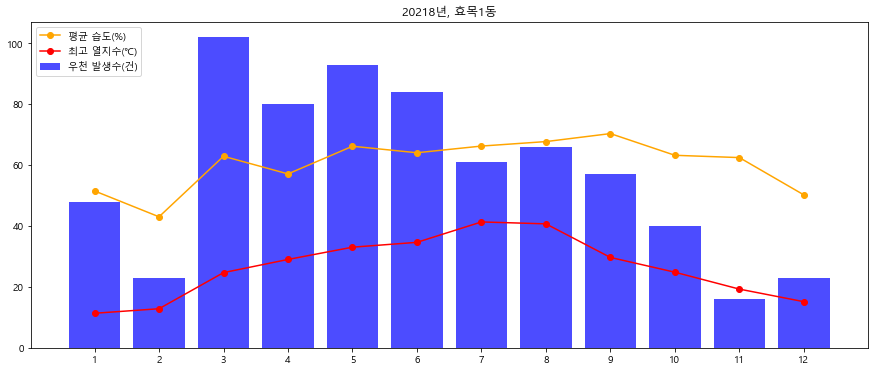

In [8]:
# 시각화
plt.figure(figsize=(15,6))
plt.title('20218년, 효목1동')

plt.plot(month, max_hum, color='orange', marker = 'o', label='평균 습도(%)', linestyle='-')
plt.bar(month, counts_rain, color='blue', label='우천 발생수(건)', alpha=0.7)
plt.plot(month, max_HI, color='red', marker = 'o', label='최고 열지수(℃)', linestyle='-')

plt.legend(loc=2)
plt.xticks(month)
plt.show()

<전체 년도 결과>
* 최고 열지수는 7, 8월경에 최고치를 기록
* 2018년 3월경 강수일이 급증하자 열지수의 증가폭 역시 다른 해에 비해 높음
* 열지수가 최고를 기록한 달 혹은 그 다음 달에 우천일 증가하는 경향
* 열지수가 최고를 기록한 달의 평균습도는 큰 변화가 없음
-> 오히려 우천 발생수에 의존

In [10]:
df_sum = pd.DataFrame(data = list(zip(max_hum, counts_rain, max_HI)), columns = ['max hum', 'counts rain', 'max HI'])

C:\Users\User\AppData\Local\Temp\ipykernel_2100\1923441360.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_corr, dtype=np.bool)


<AxesSubplot:>

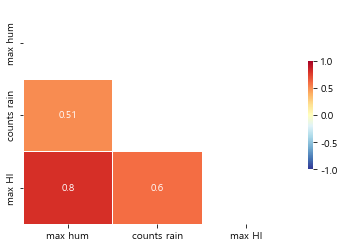

In [11]:
df_corr = df_sum.corr()

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True # 삼각형으로 표시

sns.heatmap(df_corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  

* 장마기간 외 비가 많이 온 2014년, 가뭄이 심각했던 2016년, 적은 강수일에 비해 강수량이 컸던 2018년, 태풍의 영향을 많이 받았던 2019년을 대상으로 히트맵을 그린 결과
* 최대 열지수와 강수일은 양의 상관관계를 크게 보임
* 2016년 히트맵도 참고하면 열지수와 습도는 관계가 모순되므로 두 변수는 관계가 없음

In [12]:
# 전체 데이터, 연도별 우천일 수
rainset = EDAset.copy()
RS = rainset.groupby('year')['rainfall'].nunique().reset_index()
RS

,year,rainfall
0,2010,51
1,2011,42
2,2012,43
3,2013,48
4,2014,39
5,2015,22
6,2016,180
7,2017,161
8,2018,157
9,2019,52


In [13]:
# 연도별 최대 열지수
setmax_HI = []
year = []

for i in range(2010,2023) :
    HI_temp = EDAset[EDAset['year'] == i]
    # 평균 최대 열지수 리스트
    setmax_HI.append(round(HI_temp['HI'].mean(),2))
    # 데이터 있는 연도 리스트
    year.append(i)

# 출력
print("측정연도", year)
print("평균 최대 열지수", setmax_HI)

측정연도 [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
평균 최대 열지수 [18.68, 13.75, 13.3, 14.34, 14.08, 14.02, 14.3, 14.02, 14.1, 14.59, 14.39, 14.53, 6.37]


In [14]:
maxHI = pd.DataFrame(data = list(zip(setmax_HI, year)), columns = ['max HI', 'year'])

<AxesSubplot:ylabel='열지수 (℃)'>

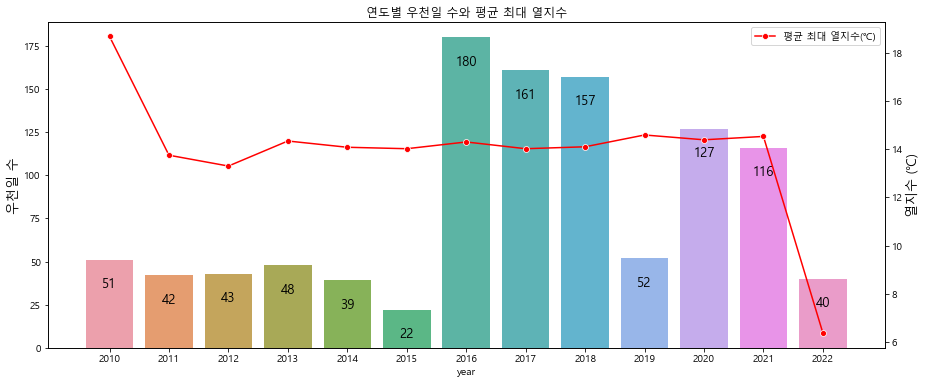

In [15]:
ax1 = sns.set_style(style=None, rc=None)

fig, ax1 = plt.subplots(figsize=(15,6))
ax1.set_title("연도별 우천일 수와 평균 최대 열지수")
sns.barplot(
    data = RS,
    x = "year",
    y = "rainfall",
    alpha=0.9,
    ax=ax1)

for p in ax1.patches:
    ax1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 20),
    ha='center', va='center', fontsize=13, color='black', xytext=(0,10),
    textcoords='offset points')
ax1.set_ylabel("우천일 수", fontsize=13)

ax2 = ax1.twinx()
ax2.set_ylabel("열지수 (℃)", fontsize=13)
sns.lineplot(
    data = maxHI['max HI'],
    marker='o',
    sort = False,
    color='red',
    label='평균 최대 열지수(℃)',
    ax=ax2)

- 데이터가 충분하지 않은 2010년과 2022년은 제외함.
- 평균 최대열지수는 대체로 비슷한 경향을 보이나 그에 반해 우천일 수는 해마다 다양하며 2016~2018년이 이례적으로 급증했다.

<관련 기사>
- (대한뉴스) 2015년은 장마기간에 강수량이 적었다.
- (동아일보) 2016년은 전체적으로 가뭄이 심각한 해다.
- (중앙일보) 2019년은 기상관측 이래 태풍의 영향을 가장 많이 받은 해로, 폭염일수는 적으나 월 평균 기온이 높았다. 또한 겨울에는 눈이 적었다.

##### 2. 매년 일일 평균 강수량 + 열지수

In [16]:
# 효목1동 기준
HMdong = EDAset[condregion]
rainheat = HMdong.copy()

In [17]:
# 데이터가 적은 2010년, 2022년은 제외하고 필요한 컬럼만 선택
cond1 = rainheat[rainheat['year'] == 2010].index
cond2 = rainheat[rainheat['year'] == 2022].index
rainheat.drop(cond1, inplace=True)
rainheat.drop(cond2, inplace=True)

In [18]:
rainheat = rainheat.reset_index()

In [19]:
RH = rainheat[['datetime','year','month','day','rainfall','HI']]
RH

,datetime,year,month,day,rainfall,HI
0,2011-01-01 00:00:00,2011,1,1,0.0,-5.7
1,2011-01-01 01:00:00,2011,1,1,0.0,-4.6
2,2011-01-01 02:00:00,2011,1,1,0.0,-2.5
3,2011-01-01 03:00:00,2011,1,1,0.0,-0.8
4,2011-01-01 04:00:00,2011,1,1,0.0,0.1
...,...,...,...,...,...,...
96427,2021-12-31 19:00:00,2021,12,31,0.0,-5.9
96428,2021-12-31 20:00:00,2021,12,31,0.0,-8.4
96429,2021-12-31 21:00:00,2021,12,31,0.0,-8.3
96430,2021-12-31 22:00:00,2021,12,31,0.0,-7.7


In [20]:
# 일별 평균 강수량과 열지수를 계산한 데이터프레임을 생성
dfRH = RH.groupby(['year','month','day']).mean()
dfRH


rainfall        HI
year month day                    
2011 1     1         0.0 -2.025000
           2         0.0 -0.602755
           3         0.0 -0.654167
           4         0.0 -0.820833
           5         0.0 -0.420833
...                  ...       ...
2021 12    27        0.0  0.016667
           28        0.0  1.455093
           29        0.0  3.362431
           30        0.0 -0.725000
           31        0.0 -3.141667

[4018 rows x 2 columns]

In [21]:
dfRH.describe()

,rainfall,HI
count,4018.000000,4018.000000
mean,0.127242,14.226217
std,0.453603,10.479638
min,0.000000,-10.779167
25%,0.000000,4.702980
50%,0.000000,14.405035
75%,0.003125,22.843785
max,8.333333,39.222891


c:\github\Team_Project\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:223: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


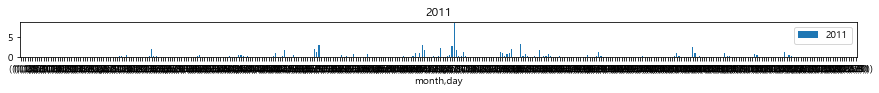

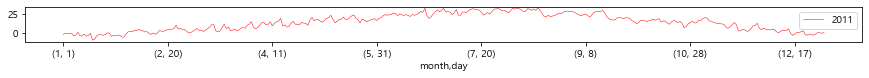

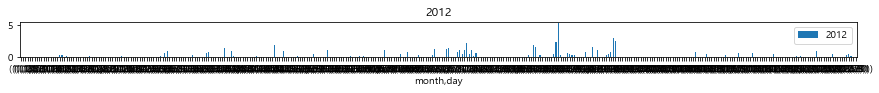

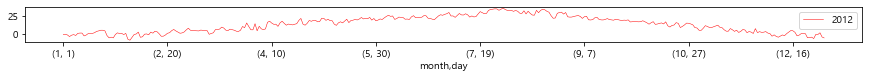

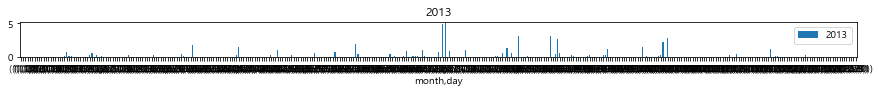

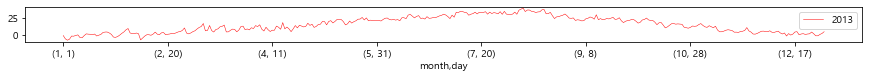

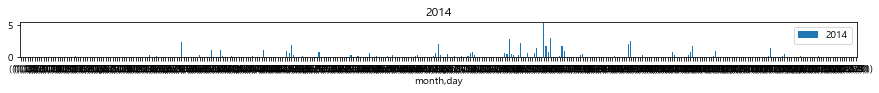

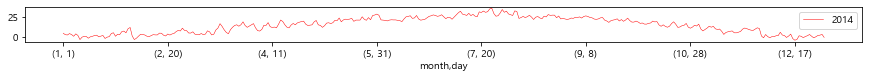

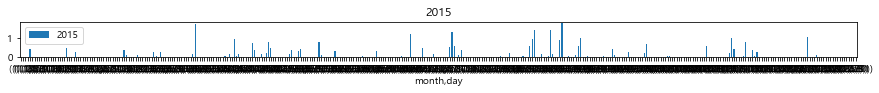

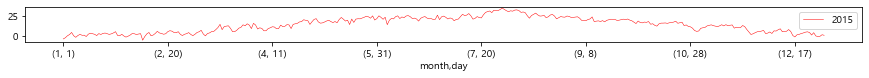

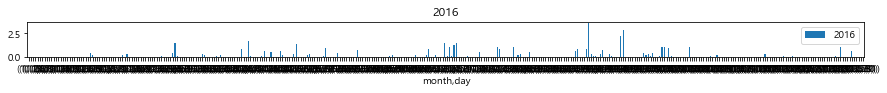

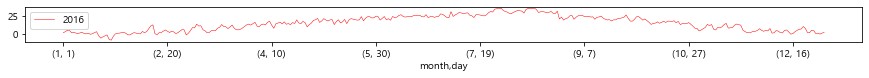

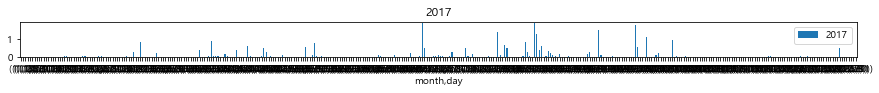

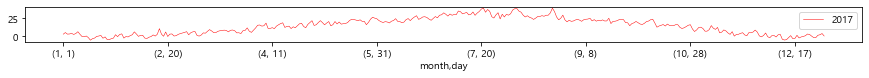

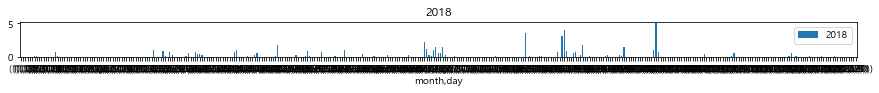

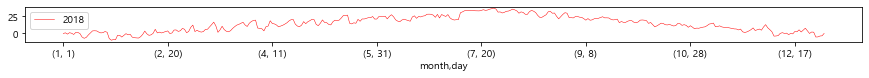

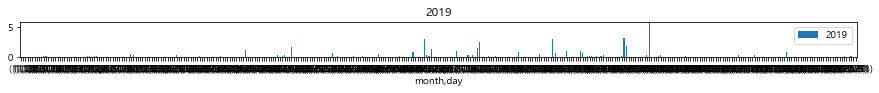

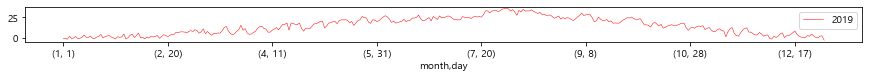

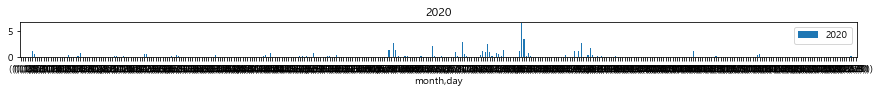

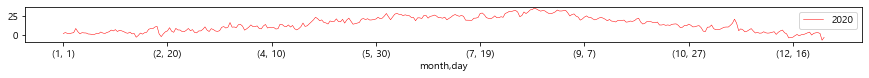

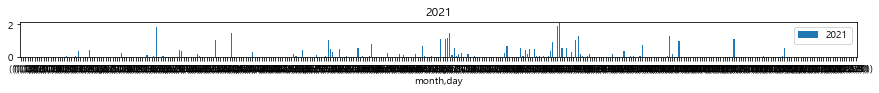

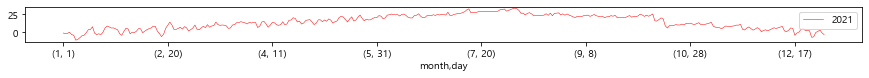

In [22]:
# 연도별 일일 평균 강수량과 평균 열지수
for i in range(2011,2022):
    temp_mean = dfRH.query('year == {0}'.format(i))

    x = temp_mean.query('day >= 1')
    y = temp_mean['rainfall']
    z = temp_mean['HI']

    
    temp_mean.unstack(level=0)['rainfall'].plot(
        kind='bar',
        subplots=True,
        rot=0,
        figsize=(15,10),
        layout=(13,1)
        )

    temp_mean.unstack(level=0)['HI'].plot(
        kind='line',
        subplots=True,
        rot=0,
        figsize=(15,10),
        layout=(13,1),
        color='red',
        linewidth=0.5
        )


- 매년 강수량과 열지수가 유사한 증감패턴을 보인다
- 열지수와 강수량은 연관이 있다

<예시>
- 2018년, 열지수가 급증하여 유지되고, 여름보다 가을에 우천일이 치우쳐 있으며 강수량이 컸다
-- 장마일과 강수일수가 적은 것에 비해 합계 강수량이 다른 해와 비교하여 평균이었으므로 강수일이 적으나 올 때마다 비가 꽤 내렸다는 분석결과와 맞음
- 2021년, 가을까지 열지수가 높았고, 여름부터 가을까지 강수량은 적었지만 거의 매일 비가 왔었다
-- 2021년은 지각장마가 왔었고, 장마철 외에도 비가 많이 왔다는 기록이 있다

#### 3. 습도+기온 상관관계 그래프

In [23]:
# 효목1동 기준
df2011 = EDAset[condregion]
humheat = df2011.copy()

In [24]:
humheat = humheat[['humidity','temp','HI','date']]

corr = humheat.corr()
print(corr)

          humidity      temp        HI
humidity  1.000000  0.138106  0.172603
temp      0.138106  1.000000  0.993401
HI        0.172603  0.993401  1.000000


- 삼각형 상관관계 그래프

C:\Users\User\AppData\Local\Temp\ipykernel_2100\3424830007.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_corr, dtype=np.bool)


<AxesSubplot:>

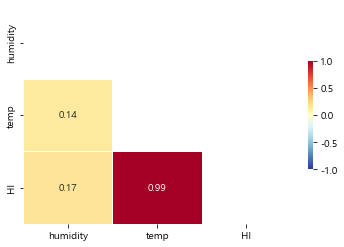

In [25]:
df_corr = humheat.corr()

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True # 삼각형으로 표시

sns.heatmap(df_corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  

- 열지수는 습도보다 기온과 상관성이 높다.
- 습도와 기온은 관련이 적다.
- 습도가 우천발생의 지표가 되지 못하므로 열지수에 영향을 주는 요인으로 파악하기 어렵다.

In [26]:
humetemp = humheat[['humidity','temp','HI','date']]

In [35]:
humetemp

,humidity,temp,HI,date
2088960,53.0,16.8,15.919444,2010-06-01 00:00:00
2088961,50.0,17.9,17.051111,2010-06-01 01:00:00
2088962,47.0,19.5,18.732778,2010-06-01 02:00:00
2088963,40.0,20.9,20.090000,2010-06-01 03:00:00
2088964,41.0,20.9,20.116111,2010-06-01 04:00:00
...,...,...,...,...
2193403,63.0,10.8,9.580556,2022-04-30 19:00:00
2193404,66.0,10.5,9.328889,2022-04-30 20:00:00
2193405,60.0,12.0,10.822222,2022-04-30 21:00:00
2193406,50.0,13.1,11.771111,2022-04-30 22:00:00


# 다시 하기

In [50]:
tempcond = humetemp.copy()

In [51]:
tempcond['year'] = tempcond['date'].dt.year

In [52]:
tempcond = tempcond[tempcond["year"]==2018]

In [53]:
tempcond

,humidity,temp,HI,date,year
2155464,39.0,1.2,1.200000,2018-01-01 00:00:00,2018
2155465,32.0,2.5,2.500000,2018-01-01 01:00:00,2018
2155466,27.0,3.4,3.400000,2018-01-01 02:00:00,2018
2155467,25.0,4.2,4.200000,2018-01-01 03:00:00,2018
2155468,25.0,4.6,1.768333,2018-01-01 04:00:00,2018
...,...,...,...,...,...
2164219,55.0,-2.6,-2.600000,2018-12-31 19:00:00,2018
2164220,55.0,-2.7,-2.700000,2018-12-31 20:00:00,2018
2164221,56.0,-2.3,-2.300000,2018-12-31 21:00:00,2018
2164222,55.0,-2.1,-2.100000,2018-12-31 22:00:00,2018


* 강사님께 질문

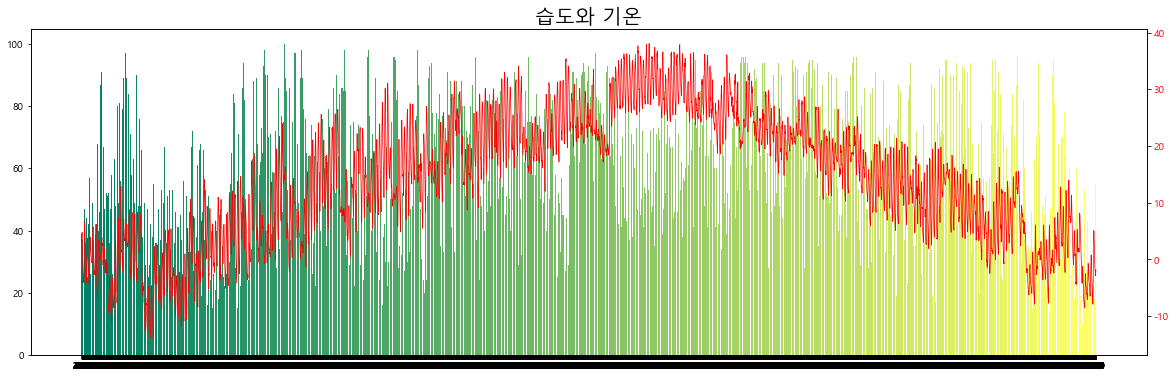

In [62]:
fig = plt.figure(figsize=(20,6)) ## Figure 생성 
fig.set_facecolor('white') ## Figure 배경색 지정
ax1 = fig.add_subplot() ## axes 생성
 
colors = sns.color_palette('summer', len(tempcond['humidity'])) ## 바 차트 색상
 
xtick_label_position = list(range(len(tempcond['humidity']))) ## x축 눈금 라벨이 표시될 x좌표
ax1.set_xticks(xtick_label_position) ## x축 눈금 
ax1.set_xticklabels(tempcond['humidity']) ## x축 눈금 라벨
ax1.bar(xtick_label_position, tempcond['humidity'], color=colors) ## 바차트 출력

color = 'red'
ax2 = ax1.twinx() ## 새로운 axis 생성
ax2.plot(xtick_label_position, tempcond['temp'], color=color, linestyle='-', linewidth = 0.7) ## 선 그래프 
ax2.tick_params(axis='y', labelcolor=color) ## 눈금 라벨 색상 지정

plt.title('습도와 기온', fontsize=20)
plt.show()

In [37]:
fig, ax = plt.subplots(figsize=(15,6))

sns.barplot(
    x = humetemp["date"],
    y = humetemp["humidity"],
    alpha=0.9
)

ax2 = ax.twinx()
sns.lineplot(
    x = humetemp["date"],
    y = humetemp["temp"],
    color='red',
    label='기온 (℃)',
    sort = False,
    linewidth=0.5
    )

ax.set_ylabel("습도", fontsize=13)
ax2.set_ylabel("기온 (℃)", fontsize=13)
ax.set_title("습도와 기온")

#plt.show()

Text(0.5, 1.0, '습도와 기온')

Error in callback <function flush_figures at 0x0000018BA8C67370> (for post_execute):


KeyboardInterrupt: 

- 전체적으로 습도의 증가 주기와 기온의 증가 주기가 일치한다.

#### 4. 년도별 매달 평균 습도 + 평균 기온

In [27]:
# 동인동 기준
df2011 = EDAset[condregion]
humheat = df2011.copy()

In [28]:
# 데이터가 적은 2010년, 2022년은 제외하고 필요한 컬럼만 선택
cond1 = humheat[humheat['year'] == 2010].index
cond2 = humheat[humheat['year'] == 2022].index
humheat.drop(cond1, inplace=True)
humheat.drop(cond2, inplace=True)

In [29]:
humheat = humheat.reset_index()

In [30]:
HH = humheat[['datetime','year','month','day','humidity','temp']]

In [31]:
dfHH = HH.groupby(['year','month']).mean()

c:\github\Team_Project\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:223: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


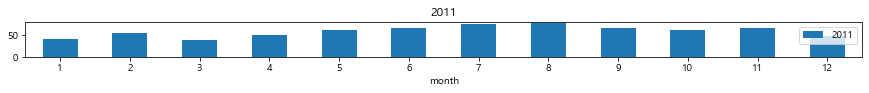

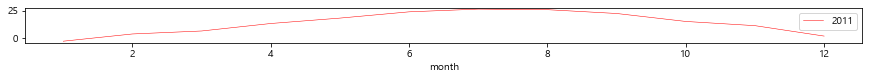

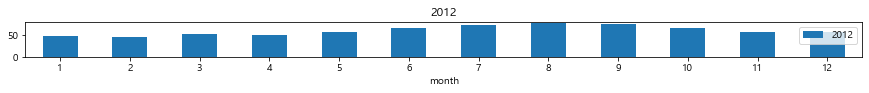

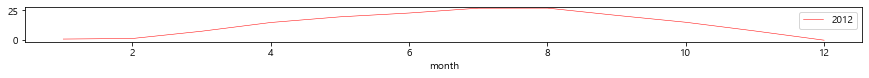

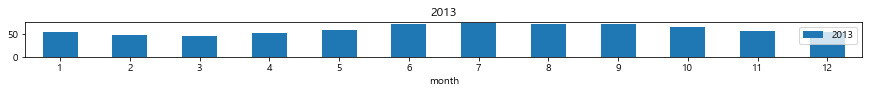

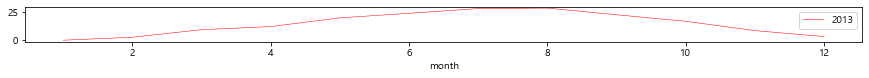

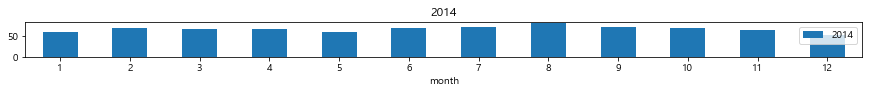

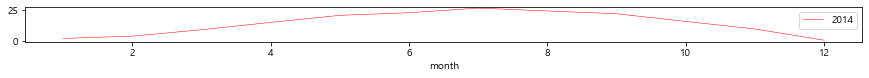

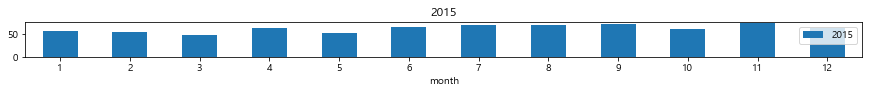

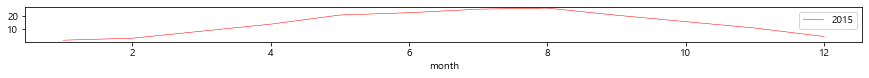

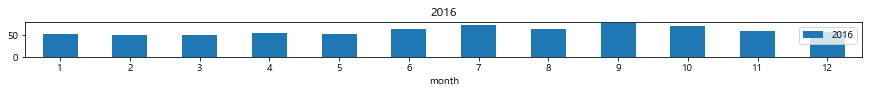

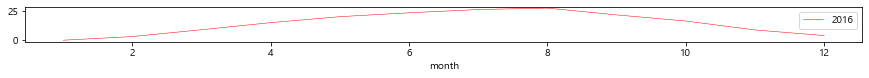

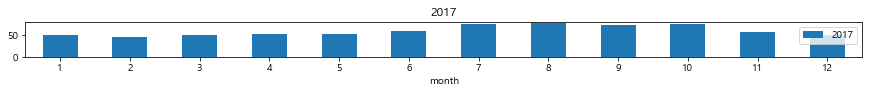

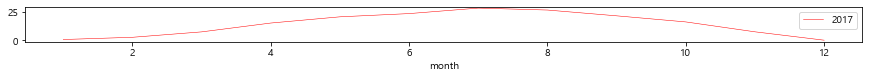

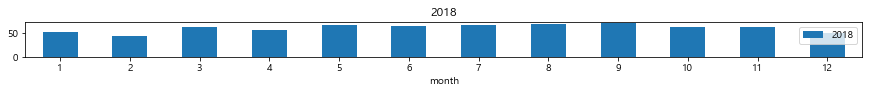

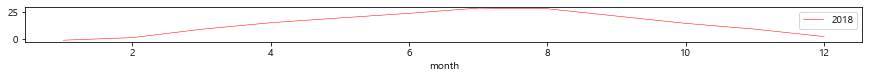

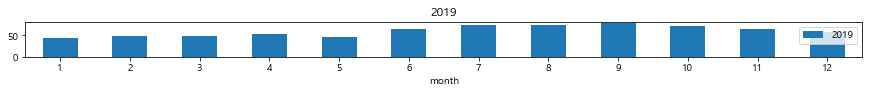

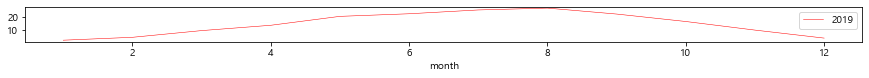

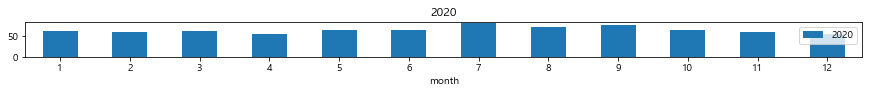

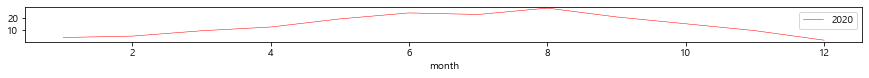

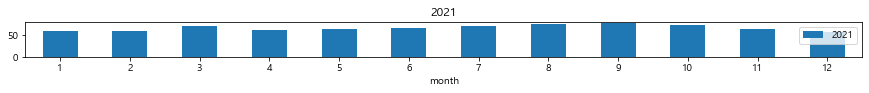

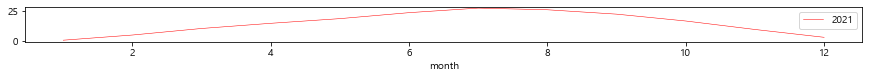

In [32]:
# 연도별 월 평균 습도와 평균 기온

for i in range(2011,2022):
    temp_mean = dfHH.query('year == {0}'.format(i))

    x = temp_mean.query('month >= 1')
    y = temp_mean['humidity']
    z = temp_mean['temp']

    
    fig = temp_mean.unstack(level=0)['humidity'].plot(
        kind='bar',
        subplots=True,
        rot=0,
        figsize=(15,10),
        layout=(13,1)
        )

    fig = temp_mean.unstack(level=0)['temp'].plot(
        kind='line',
        subplots=True,
        rot=0,
        figsize=(15,10),
        layout=(13,1),
        color='red',
        linewidth=0.5
        )


- 기온이 1개월 가량 우선적으로 증가한 후 습도가 증가하는 경향이 있다.

#### 5. 모든 달의 평균 강수량 + 평균 기온

In [33]:
# 평균계산
temp = []
humd = []
month = []

for i in range(1,13) :
    humd_high = EDAset[EDAset['date'].dt.month == i]

    #최고기온 평균
    temp.append(round(humd_high['temp'].mean(),1))

    #강수량 평균
    humd.append(round(humd_high['humidity'].mean(),1))

    month.append(i)

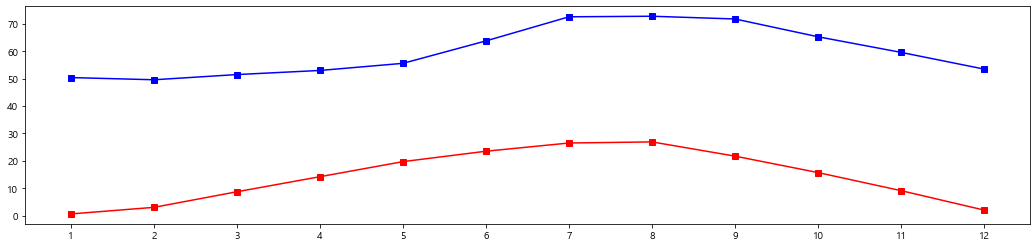

In [34]:
# 그래프 그리기
x_axis = EDAset['date'].dt.month.unique()

plt. figure(figsize=(18,4))

#plt.title('%s년부터 %s년까지 %s월의 기온 변화' % (year_start, year_end, i_month))
plt.plot(month, temp, color='red', marker = 's', label='평균기온', linestyle='-')
plt.plot(month, humd, color='blue', marker = 's', label='평균습도', linestyle='-')
#plt.legend(loc=2)
plt.xticks(month)
plt.show()

- 대체로 평균 강수량의 증가와 평균 기온의 증가 추세가 일치한다.

# 9. 대기중의 미세먼지 농도가 높으면 온도가 높다.(‘미세먼지가 많으면 통풍이 잘 안된다’ 속설 검증)
- made by MJ

In [8]:
# 미세먼지 데이터 불러오기
orig = pd.read_csv('./dataset/airpollution_daegu.csv', encoding='cp949')
orig

,지점,지점명,일시,1시간평균 미세먼지농도(㎍/㎥)
0,143,대구,2010-06-01 0:00,9.5
1,143,대구,2010-06-01 1:00,12.0
2,143,대구,2010-06-01 2:00,9.0
3,143,대구,2010-06-01 3:00,8.0
4,143,대구,2010-06-01 4:00,6.0
...,...,...,...,...
99569,143,대구,2022-04-30 19:00,23.0
99570,143,대구,2022-04-30 20:00,18.0
99571,143,대구,2022-04-30 21:00,18.0
99572,143,대구,2022-04-30 22:00,15.0


- 전처리

In [9]:
# 분석용 데이터셋으로 정리
df_airpoll = orig.iloc[:,2:]
df_airpoll.columns = ['date','concentration']
df_airpoll

,date,concentration
0,2010-06-01 0:00,9.5
1,2010-06-01 1:00,12.0
2,2010-06-01 2:00,9.0
3,2010-06-01 3:00,8.0
4,2010-06-01 4:00,6.0
...,...,...
99569,2022-04-30 19:00,23.0
99570,2022-04-30 20:00,18.0
99571,2022-04-30 21:00,18.0
99572,2022-04-30 22:00,15.0


In [10]:
# date 컬럼의 자료형을 알맞게 변환
df_airpoll['date'] = df_airpoll['date'].astype(str)
df_airpoll['date'] = pd.to_datetime(df_airpoll['date'])

In [11]:
df_airpoll

,date,concentration
0,2010-06-01 00:00:00,9.5
1,2010-06-01 01:00:00,12.0
2,2010-06-01 02:00:00,9.0
3,2010-06-01 03:00:00,8.0
4,2010-06-01 04:00:00,6.0
...,...,...
99569,2022-04-30 19:00:00,23.0
99570,2022-04-30 20:00:00,18.0
99571,2022-04-30 21:00:00,18.0
99572,2022-04-30 22:00:00,15.0


In [12]:
# date 컬럼을 각 요소로 나누기
df_airpoll['year'] = df_airpoll['date'].dt.year
df_airpoll[ 'month'] = df_airpoll['date'].dt.month
df_airpoll['day'] = df_airpoll['date'].dt.day
df_airpoll['hour'] = df_airpoll['date'].dt.hour

In [13]:
df_airpoll

,date,concentration,year,month,day,hour
0,2010-06-01 00:00:00,9.5,2010,6,1,0
1,2010-06-01 01:00:00,12.0,2010,6,1,1
2,2010-06-01 02:00:00,9.0,2010,6,1,2
3,2010-06-01 03:00:00,8.0,2010,6,1,3
4,2010-06-01 04:00:00,6.0,2010,6,1,4
...,...,...,...,...,...,...
99569,2022-04-30 19:00:00,23.0,2022,4,30,19
99570,2022-04-30 20:00:00,18.0,2022,4,30,20
99571,2022-04-30 21:00:00,18.0,2022,4,30,21
99572,2022-04-30 22:00:00,15.0,2022,4,30,22


In [14]:
# 복사본으로 작업
airpoll = df_airpoll[['date','year','month','day','hour','concentration']]

In [14]:
airpoll

,date,year,month,day,hour,concentration
0,2010-06-01 00:00:00,2010,6,1,0,9.5
1,2010-06-01 01:00:00,2010,6,1,1,12.0
2,2010-06-01 02:00:00,2010,6,1,2,9.0
3,2010-06-01 03:00:00,2010,6,1,3,8.0
4,2010-06-01 04:00:00,2010,6,1,4,6.0
...,...,...,...,...,...,...
99569,2022-04-30 19:00:00,2022,4,30,19,23.0
99570,2022-04-30 20:00:00,2022,4,30,20,18.0
99571,2022-04-30 21:00:00,2022,4,30,21,18.0
99572,2022-04-30 22:00:00,2022,4,30,22,15.0


In [15]:
daegu_final = df_pre.copy()

    1. 필요한 컬럼만 가져오기 - date, year, month, day, hour, temp
    2. 미세먼지 데이터와 조인하기
    3. 그래프 그리기

In [16]:
# 미세먼지를 측정한 대구지방기상청의 소재지 (효목1동) 데이터만 선택
region = daegu_final['region'] == '효목1동'
hmd = EDAset[region].reset_index()

In [21]:
hmd

,index,year,month,day,hour,datetime,temp,rainfall,lightning,humidity,wind_speed,wind_direction,condition,region,HI,DI,date
0,2088960,2010,6,1,0,2010-06-01 00:00:00,16.8,0.0,-1,53.0,NaN,NaN,1,효목1동,15.919444,61.14396,2010-06-01 00:00:00
1,2088961,2010,6,1,1,2010-06-01 01:00:00,17.9,0.0,-1,50.0,NaN,NaN,1,효목1동,17.051111,62.50950,2010-06-01 01:00:00
2,2088962,2010,6,1,2,2010-06-01 02:00:00,19.5,0.0,-1,47.0,NaN,NaN,1,효목1동,18.732778,64.44735,2010-06-01 02:00:00
3,2088963,2010,6,1,3,2010-06-01 03:00:00,20.9,0.0,-1,40.0,NaN,NaN,1,효목1동,20.090000,65.78540,2010-06-01 03:00:00
4,2088964,2010,6,1,4,2010-06-01 04:00:00,20.9,0.0,-1,41.0,NaN,NaN,2,효목1동,20.116111,65.84931,2010-06-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104443,2193403,2022,4,30,19,2022-04-30 19:00:00,10.8,0.0,-1,63.0,2.0,313.0,-1,효목1동,9.580556,52.77496,2022-04-30 19:00:00
104444,2193404,2022,4,30,20,2022-04-30 20:00:00,10.5,0.0,-1,66.0,1.5,337.0,-1,효목1동,9.328889,52.22770,2022-04-30 20:00:00
104445,2193405,2022,4,30,21,2022-04-30 21:00:00,12.0,0.0,-1,60.0,1.4,302.0,-1,효목1동,10.822222,54.56800,2022-04-30 21:00:00
104446,2193406,2022,4,30,22,2022-04-30 22:00:00,13.1,0.0,-1,50.0,2.3,286.0,-1,효목1동,11.771111,56.24550,2022-04-30 22:00:00


In [17]:
airset = hmd[['year','month','day','hour','temp']]

In [18]:
# 조인을 위해 date 컬럼 생성
airset['date'] = pd.to_datetime(airset[['year', 'month', 'day','hour']])
airset

C:\Users\User\AppData\Local\Temp\ipykernel_5892\552878553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airset['date'] = pd.to_datetime(airset[['year', 'month', 'day','hour']])


,year,month,day,hour,temp,date
0,2010,6,1,0,16.8,2010-06-01 00:00:00
1,2010,6,1,1,17.9,2010-06-01 01:00:00
2,2010,6,1,2,19.5,2010-06-01 02:00:00
3,2010,6,1,3,20.9,2010-06-01 03:00:00
4,2010,6,1,4,20.9,2010-06-01 04:00:00
...,...,...,...,...,...,...
104443,2022,4,30,19,10.8,2022-04-30 19:00:00
104444,2022,4,30,20,10.5,2022-04-30 20:00:00
104445,2022,4,30,21,12.0,2022-04-30 21:00:00
104446,2022,4,30,22,13.1,2022-04-30 22:00:00


In [19]:
# date 컬럼을 기준으로 조인하기
pollset = pd.merge(airset, airpoll, left_on=['year','month','day','hour','date'], right_on = ['year','month','day','hour','date'], how='outer')

In [25]:
pollset

,year,month,day,hour,temp,date,concentration
0,2010,6,1,0,16.8,2010-06-01 00:00:00,9.5
1,2010,6,1,1,17.9,2010-06-01 01:00:00,12.0
2,2010,6,1,2,19.5,2010-06-01 02:00:00,9.0
3,2010,6,1,3,20.9,2010-06-01 03:00:00,8.0
4,2010,6,1,4,20.9,2010-06-01 04:00:00,6.0
...,...,...,...,...,...,...,...
104443,2022,4,30,19,10.8,2022-04-30 19:00:00,23.0
104444,2022,4,30,20,10.5,2022-04-30 20:00:00,18.0
104445,2022,4,30,21,12.0,2022-04-30 21:00:00,18.0
104446,2022,4,30,22,13.1,2022-04-30 22:00:00,15.0


In [20]:
# 이미 결측치가 처리된 미세먼지 데이터에 반해 airset 데이터는 결측치 처리가 되지 않음
pollset['concentration'].isna().sum()


4874

# 여기부터 하기

In [32]:
# 결측치를 3차다항식으로 보간해줌
interpoll = pollset.copy()
interpoll['concentration'] = interpoll['concentration'].interpolate(method='polynomial', order=3, limit=10)

In [33]:
pollset['concentration'].isna().sum()

4874

In [34]:
# 이상치는 제거 후 최대값으로 대체


In [35]:
test = pollset[pollset['year']==2018]

In [36]:
test.reset_index()

,index,year,month,day,hour,temp,date,concentration
0,66504,2018,1,1,0,1.2,2018-01-01 00:00:00,40.0
1,66505,2018,1,1,1,2.5,2018-01-01 01:00:00,43.0
2,66506,2018,1,1,2,3.4,2018-01-01 02:00:00,41.0
3,66507,2018,1,1,3,4.2,2018-01-01 03:00:00,46.0
4,66508,2018,1,1,4,4.6,2018-01-01 04:00:00,41.0
...,...,...,...,...,...,...,...,...
8755,75259,2018,12,31,19,-2.6,2018-12-31 19:00:00,21.0
8756,75260,2018,12,31,20,-2.7,2018-12-31 20:00:00,20.0
8757,75261,2018,12,31,21,-2.3,2018-12-31 21:00:00,17.0
8758,75262,2018,12,31,22,-2.1,2018-12-31 22:00:00,22.0


<AxesSubplot:xlabel='date', ylabel='기온 (℃)'>

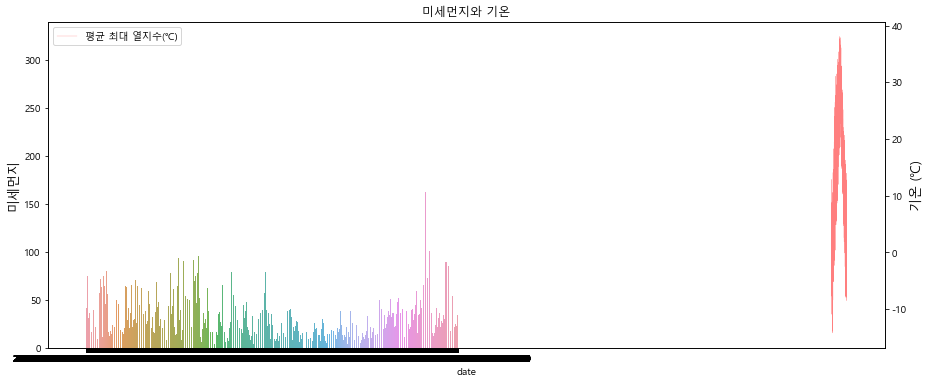

In [39]:
ax3 = sns.set_style(style=None, rc=None)

fig, ax3 = plt.subplots(figsize=(15,6))
ax3.set_title("미세먼지와 기온")
sns.barplot(
    data = test,
    x = "date",
    y = "concentration",
    alpha=0.9,
    ax=ax3)

ax3.set_ylabel("미세먼지", fontsize=13)

ax4 = ax3.twinx()
ax4.set_ylabel("기온 (℃)", fontsize=13)
sns.lineplot(
    data = test,
    x = "date",
    y = "temp",
    sort = False,
    color='red',
    label='평균 최대 열지수(℃)',
    ax=ax4,
    alpha = 0.5,
    linewidth = 0.3
    )

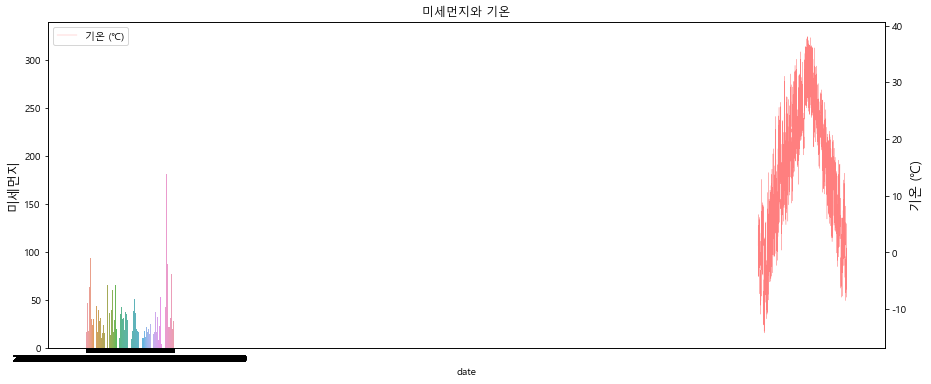

In [40]:
ax1 = sns.set_style(style=None, rc=None)
fig, ax1 = plt.subplots(figsize=(15,6))
ax1.set_title("미세먼지와 기온")
sns.barplot(
    data = test,
    x = "date",
    y = "concentration",
    alpha = 0.9,
    ax = ax1
    )
ax1.set_ylabel("미세먼지", fontsize=13)

ax2 = ax1.twinx()
ax2.set_ylabel("기온 (℃)", fontsize=13)
sns.lineplot(
    data = test['temp'],
    sort = False,
    color = 'red',
    label = '기온 (℃)',
    ax = ax2,
    alpha = 0.5,
    linewidth = 0.3)

plt.show()

Text(0, 0.5, '미세먼지')

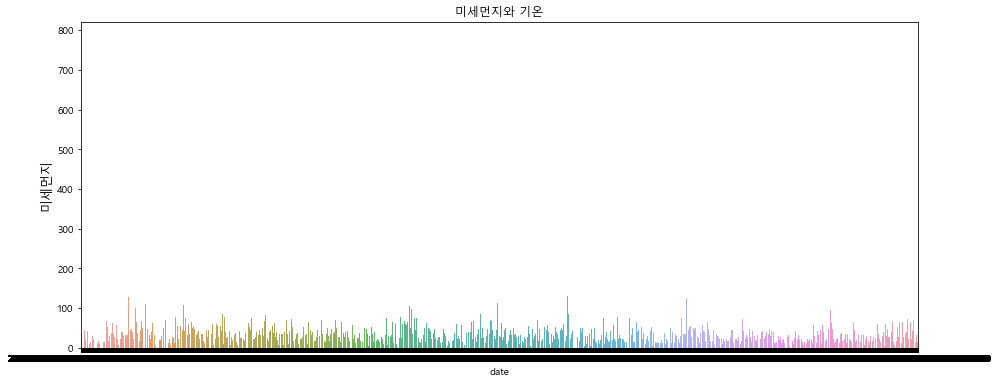

In [95]:
ax1 = sns.set_style(style=None, rc=None)
#fig, ax1 = plt.subplots(figsize=(15,6))
ax1.set_title("미세먼지와 기온")
sns.barplot(data = pollset,x ="date", y= "concentration",alpha=0.9,ax=ax1)
ax1.set_ylabel("미세먼지", fontsize=13)

In [96]:


#ax2 = ax1.twinx()
ax2.set_ylabel("기온 (℃)", fontsize=13)
sns.lineplot(data = pollset['temp'], sort = False, color='red', label='기온 (℃)',ax=ax2, alpha=0.5, linewidth=0.3)

plt.show()


Locator attempting to generate 7662 ticks ([-5235.0, ..., 109680.0]), which exceeds Locator.MAXTICKS (1000).


- 

# 10. 나무를 많이 심으면 온도가 떨어진다. (대구 녹지사업 참고)
- made by 

In [91]:
df_region = pd.read_csv('./dataset/Daegu/0 REGION.csv')
df_region

,region1,region2,region3
0,대구광역시,중구,동인동
1,대구광역시,중구,삼덕동
2,대구광역시,중구,성내1동
3,대구광역시,중구,성내2동
4,대구광역시,중구,성내3동
...,...,...,...
137,대구광역시,달성군,옥포읍
138,대구광역시,달성군,현풍읍
139,대구광역시,달성군,가창면
140,대구광역시,달성군,하빈면


In [92]:
index_None = df_region[df_region['1단계'].isna()].index
df_region.drop(index_None, inplace=True)
df_region.drop('1단계', axis=1, inplace=True)
df_region.columns = ['region2','region']

KeyError: '1단계'

In [ ]:
df_region

,region1,region2,region3
0,대구광역시,중구,동인동
1,대구광역시,중구,삼덕동
2,대구광역시,중구,성내1동
3,대구광역시,중구,성내2동
4,대구광역시,중구,성내3동
...,...,...,...
137,대구광역시,달성군,옥포읍
138,대구광역시,달성군,현풍읍
139,대구광역시,달성군,가창면
140,대구광역시,달성군,하빈면


In [ ]:
df_pre

,year,month,day,hour,datetime,temp,rainfall,lightning,humidity,wind_speed,wind_direction,condition,region,HI,DI
0,2010,6,1,0,2010-06-01 00:00:00,16.5,0.0,-1,53.0,NaN,NaN,1,동인동,15.589444,60.74355
1,2010,6,1,1,2010-06-01 01:00:00,18.1,0.0,-1,49.0,NaN,NaN,1,동인동,17.245000,62.73431
2,2010,6,1,2,2010-06-01 02:00:00,19.7,0.0,-1,46.0,NaN,NaN,1,동인동,18.926667,64.65038
3,2010,6,1,3,2010-06-01 03:00:00,20.8,0.0,-1,41.0,NaN,NaN,1,동인동,20.006111,65.72772
4,2010,6,1,4,2010-06-01 04:00:00,22.2,0.0,-1,36.0,NaN,NaN,2,동인동,21.415556,67.04608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,2022,4,30,19,2022-04-30 19:00:00,10.7,0.0,-1,71.0,2.1,335.0,-1,구지면,9.679444,52.33503
14831612,2022,4,30,20,2022-04-30 20:00:00,11.0,0.0,-1,65.0,2.2,339.0,-1,구지면,9.852778,52.99350
14831613,2022,4,30,21,2022-04-30 21:00:00,11.9,0.0,-1,61.0,2.2,338.0,-1,구지면,10.738333,54.40241
14831614,2022,4,30,22,2022-04-30 22:00:00,13.4,0.0,-1,53.0,2.0,351.0,-1,구지면,12.179444,56.60598


In [ ]:
df_10 = df_pre.merge(df_region, on='region')

KeyError: 'region'

In [ ]:
df_10

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region,region2
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1,6,2010,동인동,중구
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1,6,2010,동인동,중구
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1,6,2010,동인동,중구
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1,6,2010,동인동,중구
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2,6,2010,동인동,중구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14727163,30,19,0.0,10.700000,-1,71.0,2.1,335.0,-1,4,2022,구지면,달성군
14727164,30,20,0.0,11.000000,-1,65.0,2.2,339.0,-1,4,2022,구지면,달성군
14727165,30,21,0.0,11.900000,-1,61.0,2.2,338.0,-1,4,2022,구지면,달성군
14727166,30,22,0.0,13.400000,-1,53.0,2.0,351.0,-1,4,2022,구지면,달성군
